In [2]:
import pandas as pd
import numpy as np

In [3]:
%matplotlib inline
%pylab inline
#import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')


Populating the interactive namespace from numpy and matplotlib


In [4]:
!pip install folium
!pip install matplotlib

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
cnpj_final = pd.read_csv('/content/drive/MyDrive/TCC - PUC/dataset_final.csv',encoding='ISO-8859-1', sep=';' ,dtype=str, header=0)

In [7]:
cnpj_final

,cnpj_basico,cnpj_ordem,cnpj_dv,matriz_filial,codigo_situacao_cadastral,data_situacao_cadastral,motivo_situacao_cadastral,data_inicio_atividade,cnae_principal,codigo_municipio_siafi,capital_social,descricao_municipio,codigo_ibge,regiao,estado,populacaoTCU2019,casosAcumulado_covid,obitosAcumulado_covid,casos_acumulados_porcentagem_covid,obitos_acumulados_porcentagem_covid,casosAcumulado_corte,obitosAcumulado_corte,casos_acumulados_porcentagem_corte,obitos_acumulados_porcentagem_corte,IDH DO MUNICIPIO,IDHM EDUCACAO DO MUNICIPIO,IDHM LONGEVIDADE DO MUNICIPIO,IDHM RENDA DO MUNICIPIO,PIB,PIB PER CAPITA,cnae_divisao,cnae_secao,cnae_descricao,cnae_secao_numero,situacao_cadastral_modelo
0,29880642,0001,04,1,08,20190921,01,20180308,8712300,7107,2000.00,SAO PAULO,3550308,Sudeste,SP,12252023.0,NaN,NaN,NaN,NaN,783191.0,30596.0,6.392340269,0.2497220255,0.805,0.725,0.843,0.855,714683362463.00,58691.90,87,q,SAÚDE HUMANA E SERVIÇOS SOCIAIS,17,1
1,29880783,0001,27,1,08,20200106,01,20180308,8630503,4205,95400.00,CALDAS,3110301,Sudeste,MG,14480.0,NaN,NaN,NaN,NaN,679.0,23.0,4.6892265193,0.158839779,0.687,0.529,0.701,0.873,236518465.00,16405.53,86,q,SAÚDE HUMANA E SERVIÇOS SOCIAIS,17,1
2,29880797,0001,40,1,08,20200507,01,20180308,9511800,5403,3500.00,UBERLANDIA,3170206,Sudeste,MG,691305.0,199.0,9.0,0.0287861364,0.0013018856,NaN,NaN,NaN,NaN,0.789,0.716,0.776,0.885,37442790976.00,54801.25,95,s,OUTRAS ATIVIDADES DE SERVIÇOS,19,1
3,29880805,0001,59,1,08,20190213,01,20180308,5620104,6623,10000.00,JUQUIA,3526100,Sudeste,SP,18812.0,NaN,NaN,NaN,NaN,1508.0,38.0,8.0161598979,0.2019987242,0.7,0.637,0.654,0.823,328898903.00,17394.70,56,i,ALOJAMENTO E ALIMENTAÇÃO,9,1
4,29880816,0001,39,1,08,20190808,01,20180308,9602501,3105,1000.00,ARACAJU,2800308,Nordeste,SE,657013.0,NaN,NaN,NaN,NaN,110743.0,2074.0,16.8555264508,0.315671075,0.77,0.708,0.784,0.823,17276300787.00,26622.38,96,s,OUTRAS ATIVIDADES DE SERVIÇOS,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157252,29880238,0001,30,1,08,20190401,01,20180308,4772500,8047,40000.00,BLUMENAU,4202404,Sul,SC,357199.0,NaN,NaN,NaN,NaN,47018.0,532.0,13.162970781,0.1489365872,0.806,0.722,0.812,0.894,16958783360.00,48115.48,47,g,COMÉRCIO; REPARAÇÃO DE VEÍCULOS AUTOMOTORES E ...,7,1
11157253,29880354,0001,50,1,02,20210527,00,20180308,4712100,145,5000.00,SENA MADUREIRA,1200500,Norte,AC,45848.0,NaN,NaN,NaN,NaN,5687.0,63.0,12.4040307102,0.1374105741,0.603,0.456,0.593,0.81,518416142.00,11475.22,47,g,COMÉRCIO; REPARAÇÃO DE VEÍCULOS AUTOMOTORES E ...,7,0
11157254,29880380,0001,88,1,08,20190516,01,20180308,7319002,7107,1000.00,SAO PAULO,3550308,Sudeste,SP,12252023.0,NaN,NaN,NaN,NaN,783191.0,30596.0,6.392340269,0.2497220255,0.805,0.725,0.843,0.855,714683362463.00,58691.90,73,m,"ATIVIDADES PROFISSIONAIS, CIENTÍFICAS E TÉCNICAS",13,1
11157255,26520602,0001,63,1,08,20191219,01,20161110,4789004,7107,1000.00,SAO PAULO,3550308,Sudeste,SP,12252023.0,NaN,NaN,NaN,NaN,783191.0,30596.0,6.392340269,0.2497220255,0.805,0.725,0.843,0.855,714683362463.00,58691.90,47,g,COMÉRCIO; REPARAÇÃO DE VEÍCULOS AUTOMOTORES E ...,7,1


In [8]:
cnpj_final[["capital_social", "IDH DO MUNICIPIO","IDHM EDUCACAO DO MUNICIPIO","IDHM LONGEVIDADE DO MUNICIPIO","IDHM RENDA DO MUNICIPIO","PIB","PIB PER CAPITA"]] = cnpj_final[["capital_social", "IDH DO MUNICIPIO","IDHM EDUCACAO DO MUNICIPIO","IDHM LONGEVIDADE DO MUNICIPIO","IDHM RENDA DO MUNICIPIO","PIB","PIB PER CAPITA"]].apply(pd.to_numeric)

# **ANÁLISE EXPLORATATÓRIA DOS DADOS**

**Analisando as informações que contenham NaN**

In [9]:
cnpj_final.isna().sum()

cnpj_basico                                  0
cnpj_ordem                                   0
cnpj_dv                                      0
matriz_filial                                0
codigo_situacao_cadastral                    0
data_situacao_cadastral                      0
motivo_situacao_cadastral                    0
data_inicio_atividade                        0
cnae_principal                               0
codigo_municipio_siafi                       0
capital_social                               0
descricao_municipio                      10329
codigo_ibge                              10329
regiao                                   10329
estado                                   10329
populacaoTCU2019                         10329
casosAcumulado_covid                   9268533
obitosAcumulado_covid                  9268533
casos_acumulados_porcentagem_covid     9268533
obitos_acumulados_porcentagem_covid    9268533
casosAcumulado_corte                   1899053
obitosAcumula

**NaN nos campos: descricao_municipio, codigo_ibge, regiao e estado**

Como observado abaixo, todas as informaçãoes para os campos acima nos CNPJ´s pertencentes ao Município código SIAFI "9707" ficaram como NaN. Isso ocorreu pelo fato do código "9707" indicar empresa estabelecida no exterior e não ter correlação com código IBGE. Logo, os CNPJ´s com essa condição serão eliminados da base de dados.

In [10]:
codigo_municipio_siafi_NaN = cnpj_final[cnpj_final['codigo_ibge'].isnull()]

In [11]:
codigo_municipio_siafi_NaN

,cnpj_basico,cnpj_ordem,cnpj_dv,matriz_filial,codigo_situacao_cadastral,data_situacao_cadastral,motivo_situacao_cadastral,data_inicio_atividade,cnae_principal,codigo_municipio_siafi,capital_social,descricao_municipio,codigo_ibge,regiao,estado,populacaoTCU2019,casosAcumulado_covid,obitosAcumulado_covid,casos_acumulados_porcentagem_covid,obitos_acumulados_porcentagem_covid,casosAcumulado_corte,obitosAcumulado_corte,casos_acumulados_porcentagem_corte,obitos_acumulados_porcentagem_corte,IDH DO MUNICIPIO,IDHM EDUCACAO DO MUNICIPIO,IDHM LONGEVIDADE DO MUNICIPIO,IDHM RENDA DO MUNICIPIO,PIB,PIB PER CAPITA,cnae_divisao,cnae_secao,cnae_descricao,cnae_secao_numero,situacao_cadastral_modelo
5665,30373496,0001,00,1,08,20200608,01,20180504,6463800,9707,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64,k,"ATIVIDADES FINANCEIRAS, DE SEGUROS E SERVIÇOS ...",11,1
7892,30551490,0001,85,1,08,20201015,01,20180524,6630400,9707,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66,k,"ATIVIDADES FINANCEIRAS, DE SEGUROS E SERVIÇOS ...",11,1
9165,30650487,0001,19,1,08,20190926,01,20180607,6203100,9707,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62,j,INFORMAÇÃO E COMUNICAÇÃO,10,1
13307,30979032,0001,41,1,08,20200424,01,20180719,6462000,9707,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64,k,"ATIVIDADES FINANCEIRAS, DE SEGUROS E SERVIÇOS ...",11,1
19535,31481166,0001,09,1,08,20200914,01,20180912,6462000,9707,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64,k,"ATIVIDADES FINANCEIRAS, DE SEGUROS E SERVIÇOS ...",11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11133344,27617862,0001,14,1,08,20190502,01,20170427,6462000,9707,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64,k,"ATIVIDADES FINANCEIRAS, DE SEGUROS E SERVIÇOS ...",11,1
11135158,27812408,0001,14,1,08,20190710,01,20170524,6630400,9707,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66,k,"ATIVIDADES FINANCEIRAS, DE SEGUROS E SERVIÇOS ...",11,1
11136663,27972146,0001,55,1,08,20200303,01,20170614,6462000,9707,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64,k,"ATIVIDADES FINANCEIRAS, DE SEGUROS E SERVIÇOS ...",11,1
11152072,29447982,0001,46,1,08,20190521,01,20170914,2222600,9707,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,c,INDÚSTRIAS DE TRANSFORMAÇÃO,3,1


In [12]:
codigo_municipio_siafi_NaN.groupby('codigo_municipio_siafi')['codigo_municipio_siafi'].count() # Agrupamento de CNAE´s principais para identificação de possíveis disparidades

codigo_municipio_siafi
9707    10329
Name: codigo_municipio_siafi, dtype: int64

In [13]:
cnpj_final = cnpj_final[cnpj_final.codigo_municipio_siafi != "9707"]  #EMPRESAS DO EXTERIOR

**NaN nos campos: casosAcumulado_covid, obitosAcumulado_covid, casos_acumulados_porcentagem_covid, obitos_acumulados_porcentagem_covid, casosAcumulado_corte, obitosAcumulado_corte, casos_acumulados_porcentagem_corte e obitos_acumulados_porcentagem_corte**

Os casos de NaN nos campos de "COVID" e "CORTE" estão relacionados com dois pontos: 
1) a data de corte das informações baseada na ocorrência de COVID no período e na situação cadastral do CNPJ. Nesse caso, como iremos tratar de forma distinta as informações de cada período:

*   campos de COVID: Os CNPJ´s FECHADOS no período de 28 meses receberão o valor correspondente de COVID na da data de fechamento da empresa e, caso seja fora do período de COVID, o valor zero (0). Já os valores dos campos para as empresas ABERTAS seguem indefinidos. Obs: TEMPORARIAMENTE ESTAREI DEFININDO COMO ZERO (0) ESSES CAMPOS.
*   campos CORTE: Os CNPJ´s FECHADOS receberão o valor zero (0). Já as empresas ABERTAS receberão o valor correspondente ao último dia do período de corte, ou seja, 31/05/2021;

In [14]:
cnpj_final['casosAcumulado_covid'].fillna(0, inplace = True)
cnpj_final['obitosAcumulado_covid'].fillna(0, inplace = True)
cnpj_final['casos_acumulados_porcentagem_covid'].fillna(0, inplace = True)
cnpj_final['obitos_acumulados_porcentagem_covid'].fillna(0, inplace = True)
cnpj_final['casosAcumulado_corte'].fillna(0, inplace = True)
cnpj_final['obitosAcumulado_corte'].fillna(0, inplace = True)
cnpj_final['casos_acumulados_porcentagem_corte'].fillna(0, inplace = True)
cnpj_final['obitos_acumulados_porcentagem_corte'].fillna(0, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


**NaN nos campos: IDH DO MUNICIPIO, IDHM EDUCACAO DO MUNICIPIO, IDHM LONGEVIDADE DO MUNICIPIO e IDHM RENDA DO MUNICIPIO**

Os munípios listados abaixo não possuem informações de IDH para o ano de 2010. Por esse motivo, para evitar incoerências nas análises, os CNPJ´s desses municípios serão eliminados da base de dados.


In [15]:
idh_municipios_NaN = cnpj_final[cnpj_final['IDH DO MUNICIPIO'].isnull()]

In [16]:
idh_municipios_NaN.groupby('codigo_ibge')['codigo_ibge'].count()

codigo_ibge
1504752    332
4212650    461
4220000    945
4314548    159
5006275    261
Name: codigo_ibge, dtype: int64

In [17]:
cnpj_final = cnpj_final[cnpj_final.codigo_ibge != "1504752"]  #MUNICÍPIOS SEM INFORMAÇÕES DE IDH
cnpj_final = cnpj_final[cnpj_final.codigo_ibge != "4212650"]
cnpj_final = cnpj_final[cnpj_final.codigo_ibge != "4220000"]
cnpj_final = cnpj_final[cnpj_final.codigo_ibge != "4314548"]  
cnpj_final = cnpj_final[cnpj_final.codigo_ibge != "5006275"]  

In [18]:
cnpj_final.isna().sum()

cnpj_basico                            0
cnpj_ordem                             0
cnpj_dv                                0
matriz_filial                          0
codigo_situacao_cadastral              0
data_situacao_cadastral                0
motivo_situacao_cadastral              0
data_inicio_atividade                  0
cnae_principal                         0
codigo_municipio_siafi                 0
capital_social                         0
descricao_municipio                    0
codigo_ibge                            0
regiao                                 0
estado                                 0
populacaoTCU2019                       0
casosAcumulado_covid                   0
obitosAcumulado_covid                  0
casos_acumulados_porcentagem_covid     0
obitos_acumulados_porcentagem_covid    0
casosAcumulado_corte                   0
obitosAcumulado_corte                  0
casos_acumulados_porcentagem_corte     0
obitos_acumulados_porcentagem_corte    0
IDH DO MUNICIPIO

...

**Início da Análise Coluna a Coluna**

In [19]:
cnpj_final.shape

(11144770, 35)

In [20]:
cnpj_final.nunique()

cnpj_basico                            10911933
cnpj_ordem                                 5353
cnpj_dv                                     100
matriz_filial                                 2
codigo_situacao_cadastral                     2
data_situacao_cadastral                     851
motivo_situacao_cadastral                    15
data_inicio_atividade                     17348
cnae_principal                             1321
codigo_municipio_siafi                     5565
capital_social                            54293
descricao_municipio                        5286
codigo_ibge                                5565
regiao                                        5
estado                                       27
populacaoTCU2019                           5073
casosAcumulado_covid                      32090
obitosAcumulado_covid                      4642
casos_acumulados_porcentagem_covid       332646
obitos_acumulados_porcentagem_covid      126682
casosAcumulado_corte                    

**1) cnpj_basico, cnpj_ordem e cnpj_dv**
- Colunas que diferenciam os CNPJ´s das empresas em análise - nenhuma ação a ser tomada

**2) matriz_filial**
- Coluna que indica se O CNPJ é de uma Matriz (1) ou Filial (2)

**3) capital_social**
- Devido a alta amplitude dos dados, essa coluna será transformada em uma coluna com faixas de valores, conforme tabela abaixo:

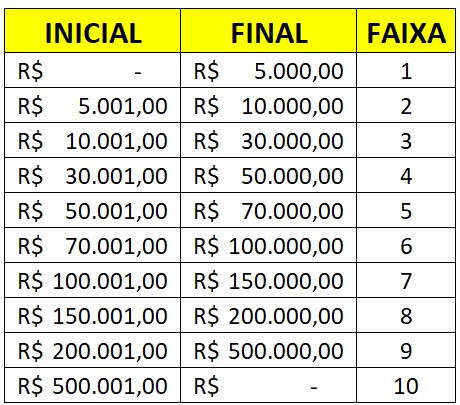

In [21]:
cnpj_final['capital_social_faixas']=pd.cut(

   cnpj_final['capital_social'],

   bins=[0, 5000, 10000, 30000, 50000, 70000, 100000, 150000, 200000, 500000, sys.maxsize],

   labels=['1', '2', '3', '4', '5','6','7','8','9','10']
)

**4) codigo_situacao_cadastral e motivo_situacao_cadastral**  



*   codigo_situacao_cadastral : indica a situação cadastral da empresa. Como a finalidade do trabalho em questão é a identificação das empresas que fecharam no período e o impacto nas empresas abertas, selecionaremos somente as empresas com situação cadastral (2) - ATIVA e (8) - BAIXADA.
*   motivo_situacao_cadastral : respresenta o motivo pelo qual a situação cadastral da empresa sofreu alteração. Como o foco deste estudo baseia-se na análise das empresas fechadas e abertas no período, o motivo é irrelevante e, portanto, a coluna será eliminada.

**5) data_inicio_atividade, data_situacao_cadastral,  situacao_cadastral_modelo**


*   data_inicio_atividade : É a data inicial do CNPJ, data em que a empresa foi constituída. Essa data, no caso das empresas que possuem a situação cadastral (2) - ATIVA, é a mesma da data_situacao_cadstral. Não iremos fazer nenhuma ação nesta coluna pois a seleção será feita na data_situacao_cadastral (que representa a data em que a situação cadastral foi alterada).
*   data_situacao_cadastral : representa a data em que houve a última alteração da situação cadastral, ou seja, no caso da situação cadastral (2) - ATIVA, é a mesma da data de abertura da empresa e no caso da situação cadastral (8) - BAIXADA, é a data em que ocorreu o encerramento do CNPJ.
*   situacao_cadastral_modelo : é a coluna target do nosso modelo de aprendizagem.

**6) codigo_ibge, codigo_municipio_siafi,  descricao_municipio,  regiao,  estado,**




*   codigo_ibge : código utilizado pela maioria das tabelas para identificar o 
Munípio brasileiro alvo das informações. Será utilizado para o join dos dados entre as tabelas.
*   codigo_municipio_siafi : código utilizado pela Receita Federal do Brasil para identificar o Município na tabela de Dados Públicos de CNPJ. Durante o trabalho de transformação dos dados, o mesmo foi relacionado e substituído pelo Código do IBGE (utilizado nas demais tabelas incorporadas). Será eliminada.
*   descricao_municipio : nome do Município brasileiro
*   regiao : nome da Região a qual pertence o Município
*   estado : nome do Estado ao qual pertence o Município

# **7) COVID**


Dados obitidos no site: https://covid.saude.gov.br demonstrando o acumulado de casos e mortes por COVID. O primeiro caso de COVID registrado no Brasil se deu em 26/02/2020. Já o computo de casos por município começou timidamente em 27/03/2020. Dessa forma, consideramos para o nosso estudo o dia 01/04/2020, data em que todos os municípios começaram a informar os casos registrados em suas localidades.

Para um melhor estudo do impacto da COVID no fechamento das empresas, realizamos um corte no dataset considerando a data da situação cadastral como delimitador do prazo. No total, estamos avaliando 28 meses de atividade, divididos da seguinte forma:


1.   Período 20-21 - COM COVID (14 meses) - Início: 01/04/2020 - Término: 31/05/2021
2.   Período 19-20 - SEM COVID (14 meses) - Início: 01/02/2019 - Término: 31/03/2020

**7.1)  Período 20-21 - COM COVID (14 meses) - Início: 01/04/2020 - Término: 31/05/2021**

Os CNPJ´s com informações nestes campos são os que fecharam no período acima descrito, ou seja, TODAS as empresas que possuam a situação cadastral como "8" dentro dos 14 meses de ocorrência de COVID. Os demais campos, ou seja, as empresas com situação cadastral "8" FORA dos meses de ocorrência de COVID, estão zerados e as empresas com a situação cadastral "2" serão DEFINIDAS POSTERIORMENTE

*   casosAcumulado_covid : número acumulado até a data de encerramento do CNPJ de casos de COVID no Município em análise
*   obitosAcumulado_covid : número acumulado até a data de encerramento do CNPJ de casos de óbitos por COVID no Município em análise
*   casos_acumulados_porcentagem_covid : percentual do acumulado de casos de COVID pelo total de habitantes do Município
*   obitos_acumulados_porcentagem_covid : percentual do acumulado de casos de óbitos por COVID pelo total de habitantes do Município





**7.2) Período 19-20 - SEM COVID (14 meses) - Início: 01/02/2019 - Término: 31/03/2020**

Os CNPJ´s com informações nestes campos são as empresas que abriram durante o período acima descrito. Como definição, imputamos os dados de ocorrência de COVID de cada Município do dia 31/03/2021. Os demais campos, ou seja, de empresas com situação cadastral "8", estão zerados. NECESSÁRIA A ATUALIZAÇÃO DAS EMPRESAS FECHADAS FORA DO PERÍODO DE COVID PARA ZERO.

casosAcumulado_corte, obitosAcumulado_corte, casos_acumulados_porcentagem_corte e obitos_acumulados_porcentagem_corte

*   casosAcumulado_corte : número acumulado até a data de corte, 31/03/2021, de casos de COVID no Município em análise
*   obitosAcumulado_corte : número acumulado até a data de corte, 31/03/2021, de casos de óbitos por COVID no Município em análisee
*   casos_acumulados_porcentagem_corte : percentual do acumulado de casos de COVID até a data de corte, 31/03/2021, pelo total de habitantes do Município
*   obitos_acumulados_porcentagem_corte : percentual do acumulado de casos de óbitos por COVID até a data de corte, 31/03/2021,  pelo total de habitantes do Município

**8) IDH DO MUNICIPIO, IDHM EDUCACAO DO MUNICIPIO, IDHM LONGEVIDADE DO MUNICIPIO e IDHM RENDA DO MUNICIPIO**



*   IDH DO MUNICIPIO : O Índice de Desenvolvimento Humano (IDH) é uma unidade de medida utilizada para aferir o grau de desenvolvimento de uma determinada sociedade nos quesitos de educação, saúde e renda.
O IDH é uma referência numérica que varia entre 0 e 1. Quanto mais próximo de zero, menor é o indicador para os quesitos de saúde, educação e renda. Quanto mais próximo de 1, melhores são as condições para esses quesitos.


*   IDHM EDUCACAO DO MUNICIPIO : O indicador educação refere-se à quantidade média de anos de estudo de uma população. Entende-se que, quanto maior for o tempo de permanência de uma população na escola, melhores serão as chances de desenvolvimento para esse país.
*   IDHM LONGEVIDADE DO MUNICIPIO : Na variável saúde, avalia-se basicamente a taxa de expectativa de vida dos cidadãos de cada país participante. Entende-se que, quanto maior for essa taxa, melhores serão as condições de vida de seus habitantes.
*   IDHM RENDA DO MUNICIPIO : No quesito renda, mede-se o valor médio do rendimento dos cidadãos com base na média do Produto Interno Bruto (PIB), que é a soma de toda a riqueza produzida por um país em determinado período (normalmente anual) dividida pelo número de habitantes.






**9) populacaoTCU2019, PIB,  PIB PER CAPITA**



*   populacaoTCU2019 : estimativa do número de habitantes do Município no Censo realizado pelo IBGE no ano de 2019
*   PIB : PIB Municipal: Indicador que consolida as informações da atividade econômica dos municípios. O principal objetivo do PIB Municipal é demonstrar a dinâmica e a performance econômica do município, a partir da consolidação de um conjunto de informações relativas a todos os segmentos produtivos.
*   PIB PER CAPITA : Valor do PIB municipal per capita, calculado como sendo o PIB Municipal do ano dividido pela população do mesmo ano. Os valores são apresentados em reais correntes, não sendo aplicado nenhum deflator ou fator de correção.






**10) cnae_principal,  cnae_divisao,  cnae_secao_numero,  cnae_secao,  cnae_descricao**  

A CNAE é a classificação de atividades econômicas oficialmente adotada pelo Sistema Estatístico Nacional
e pelos órgãos gestores de cadastros e registros da Administração Pública do país.
A CNAE é uma classificação hierarquizada em cinco níveis – seções, divisões, grupos, classes e subclasses.
O quinto nível, o de subclasses, corresponde ao detalhamento usado para a identificação econômica das
unidades de produção, normalmente constituídas como pessoa jurídica ou profissionais autônomos, em
cadastros e registros da Administração Pública, nas três esferas de governo.

*   cnae_principal : representa a subclasse da classificação. A coluna será eliminada pois representa um número elevado de itens na sua classificação. Optamos pela utilização da classificação baseada na Seção.
Todavia, ao analisarmos o gráfico com o agrupamento por seção, identificamos duas categorias com alto número de ocorrências: "COMÉRCIO; REPARAÇÃO DE VEÍCULOS AUTOMOTORES E MOTOCICLETAS" e "OUTRAS ATIVIDADES DE SERVIÇOS". Analisando detalhadamente os dois grupos, observações incoerrências no último. Conforme demonstrado na tabela de agrupamento de CNAE´s e no gráfico desse agrupamento, o CNAE Principal "9492800" (Atividades de organizações políticas) será eliminado pois não caracteriza empresas "DE FATO", objeto deste trabalho. O segundo CNAE com maior número de fechamentos (4781400), representa o setor "Comércio varejista de artigos do vestuário e acessórios", será mantido pois é alvo deste estudo. Por outro lado, conforme analisado abaixo, não houve discrepânicas nos CNAE´s da empresas abertas no período, pois o CNAE com maior abertura foi o CNAE Principal "4781400" (Comércio varejista de artigos do vestuário e acessórios), alvo deste estudo.
*   cnae_divisao : representa a divisão na classificação CNAE.
*   cnae_secao_numero : representação numérica da classificação da seção do CNAE que é em letras.
*   cnae_secao : representa a seção na classificação CNAE a qual pertence o CNPJ. É composto por 21 seções, nível mais elevado da classificação CNAE, o qual será considerado no nosso estudo para observar o impacto do COVID em setores da economia.
*   cnae_descricao : descrição da seção em análise.

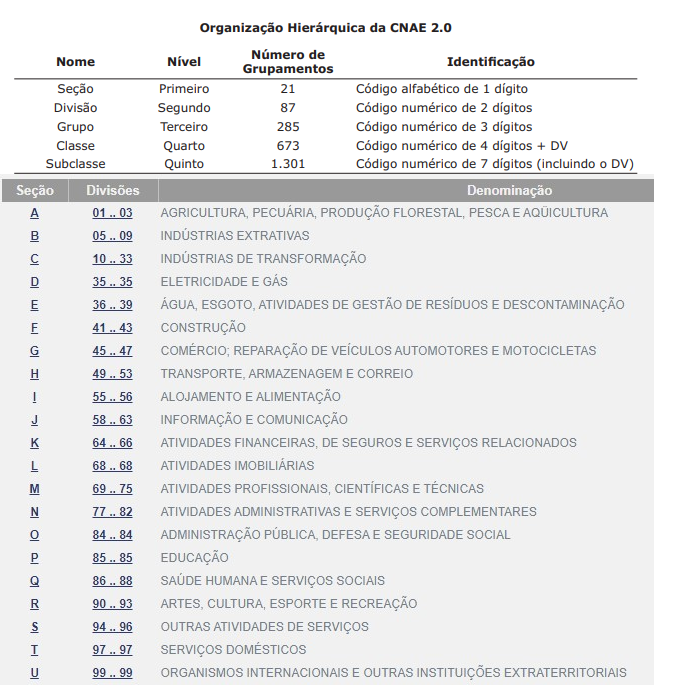

**10.1) ANÁLISE DAS EMPRESAS FECHADAS NO PERÍODO**

In [22]:
cnpj_final_fechadas_total = cnpj_final.query( 'codigo_situacao_cadastral=="08"') # Tabela somente com os dados de empresas fechadas no período

In [23]:
cnae=cnpj_final_fechadas_total.groupby('cnae_descricao')['cnae_descricao'].count() # Agrupamento de CNAE´s principais para identificação de possíveis disparidades

In [24]:
cnae = cnae.sort_values(ascending=False)

In [25]:
cnae

cnae_descricao
COMÉRCIO; REPARAÇÃO DE VEÍCULOS AUTOMOTORES E MOTOCICLETAS           945971
OUTRAS ATIVIDADES DE SERVIÇOS                                        742600
ALOJAMENTO E ALIMENTAÇÃO                                             286946
INDÚSTRIAS DE TRANSFORMAÇÃO                                          224239
ATIVIDADES ADMINISTRATIVAS E SERVIÇOS COMPLEMENTARES                 187709
ATIVIDADES PROFISSIONAIS, CIENTÍFICAS E TÉCNICAS                     180403
TRANSPORTE, ARMAZENAGEM E CORREIO                                    180262
CONSTRUÇÃO                                                           165190
EDUCAÇÃO                                                             110072
INFORMAÇÃO E COMUNICAÇÃO                                              79213
SAÚDE HUMANA E SERVIÇOS SOCIAIS                                       54938
AGRICULTURA, PECUÁRIA, PRODUÇÃO FLORESTAL, PESCA E AQÜICULTURA        42775
ARTES, CULTURA, ESPORTE E RECREAÇÃO                                   307

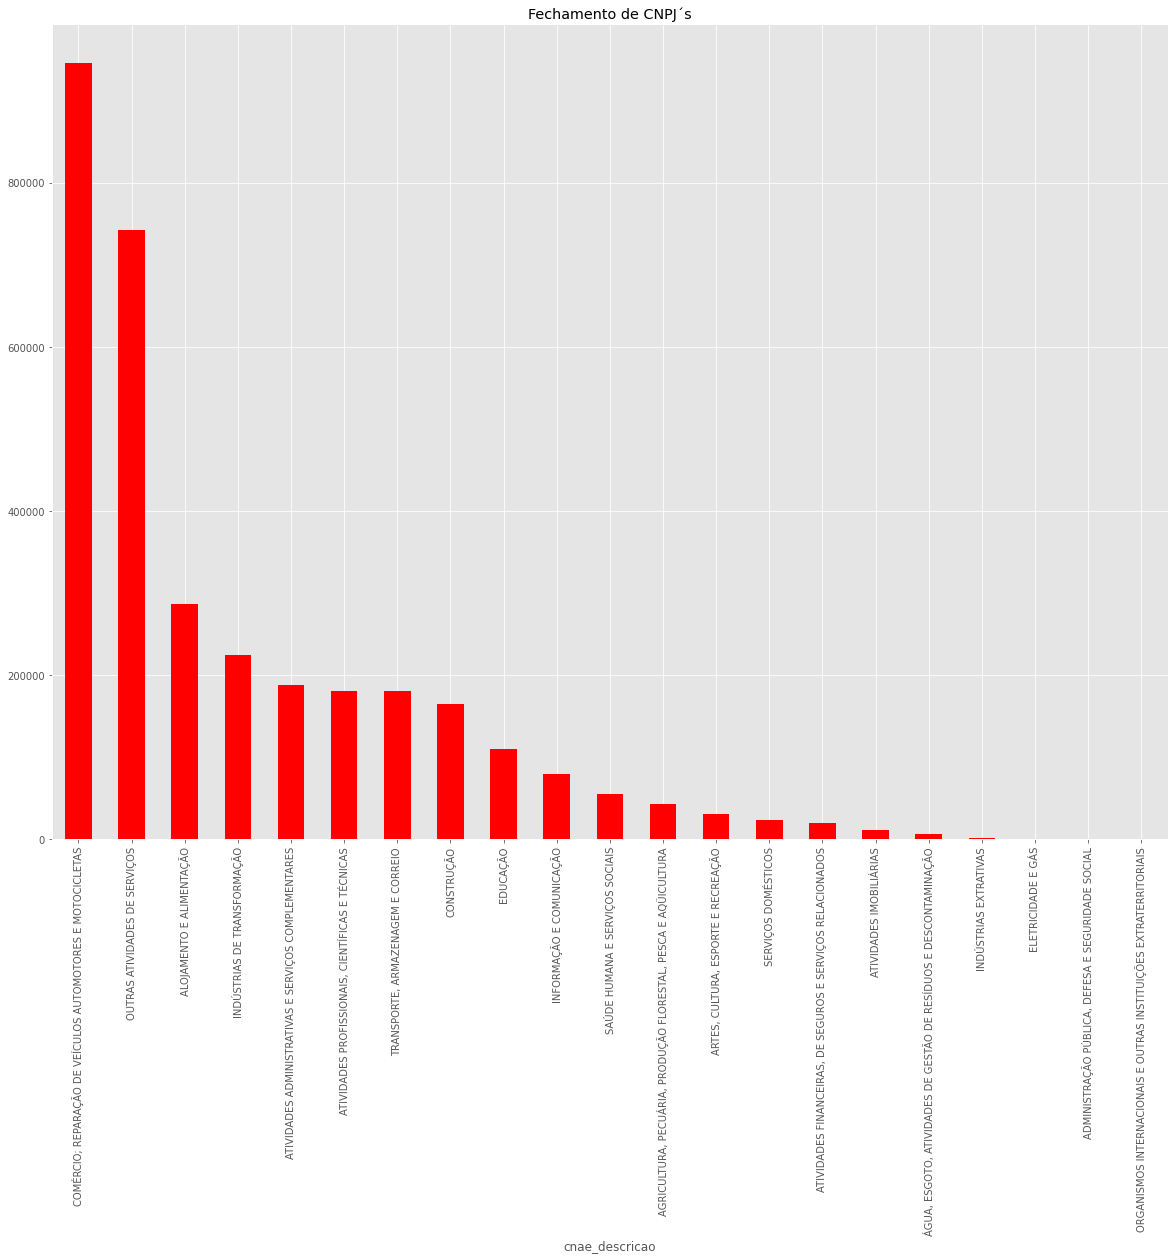

In [26]:
cnae.plot(kind='bar', figsize=(20,15), color='r', title='Fechamento de CNPJ´s')

In [27]:
cnae=cnpj_final_fechadas_total.groupby('cnae_principal')['cnae_principal'].count() # Agrupamento de CNAE´s principais para identificação de possíveis disparidades

In [28]:
cnae = cnae.sort_values(ascending=False)

In [29]:
cnae_maiores = cnae [0:30]

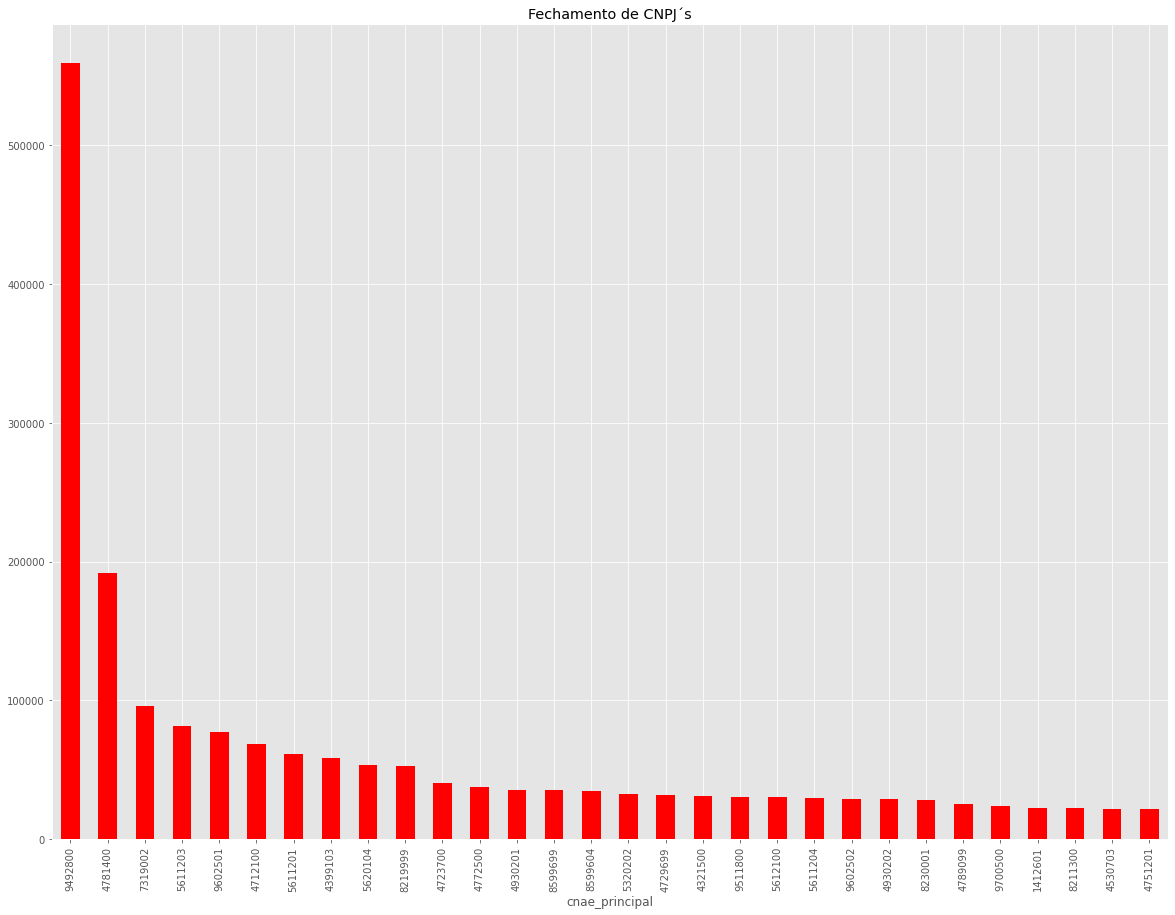

In [30]:
cnae_maiores.plot(kind='bar', figsize=(20,15), color='r', title='Fechamento de CNPJ´s')

**10.2) ANÁLISE DAS EMPRESAS ABERTAS NO PERÍODO**

In [31]:
cnpj_final_abertas_total = cnpj_final.query( 'codigo_situacao_cadastral=="02"') # Tabela somente com os dados de empresas fechadas no período

In [32]:
cnae=cnpj_final_abertas_total.groupby('cnae_descricao')['cnae_descricao'].count() # Agrupamento de CNAE´s principais para identificação de possíveis disparidades

In [33]:
cnae = cnae.sort_values(ascending=False)

In [34]:
cnae

cnae_descricao
COMÉRCIO; REPARAÇÃO DE VEÍCULOS AUTOMOTORES E MOTOCICLETAS           2155737
OUTRAS ATIVIDADES DE SERVIÇOS                                         814329
ALOJAMENTO E ALIMENTAÇÃO                                              801567
INDÚSTRIAS DE TRANSFORMAÇÃO                                           662225
TRANSPORTE, ARMAZENAGEM E CORREIO                                     614224
CONSTRUÇÃO                                                            613727
ATIVIDADES PROFISSIONAIS, CIENTÍFICAS E TÉCNICAS                      534939
ATIVIDADES ADMINISTRATIVAS E SERVIÇOS COMPLEMENTARES                  487761
EDUCAÇÃO                                                              290665
SAÚDE HUMANA E SERVIÇOS SOCIAIS                                       216441
INFORMAÇÃO E COMUNICAÇÃO                                              191736
AGRICULTURA, PECUÁRIA, PRODUÇÃO FLORESTAL, PESCA E AQÜICULTURA        119439
SERVIÇOS DOMÉSTICOS                                          

In [35]:
cnae=cnpj_final_abertas_total.groupby('cnae_principal')['cnae_principal'].count() # Agrupamento de CNAE´s principais para identificação de possíveis disparidades

In [36]:
cnae = cnae.sort_values(ascending=False)

In [37]:
cnae_maiores = cnae [0:30]

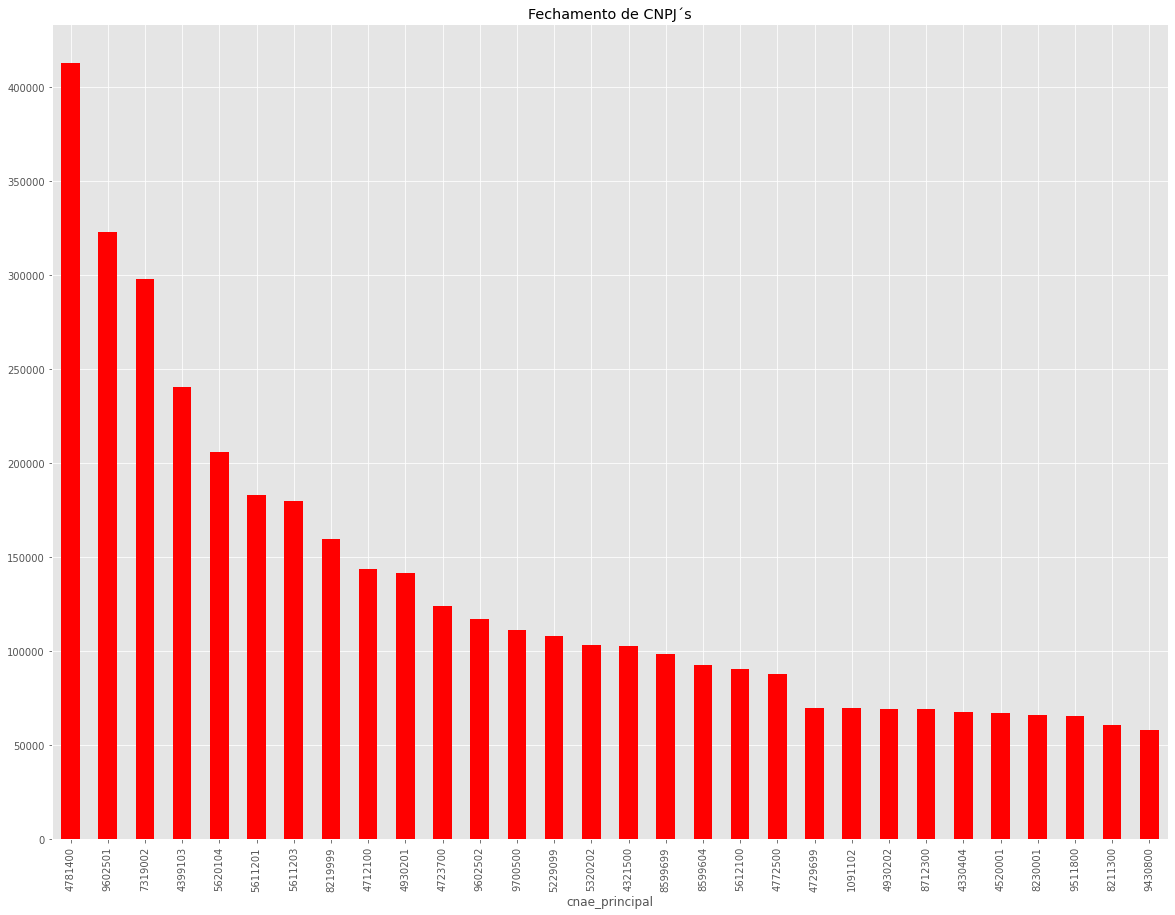

In [38]:
cnae_maiores.plot(kind='bar', figsize=(20,15), color='r', title='Fechamento de CNPJ´s')

In [39]:
cnpj_final = cnpj_final[cnpj_final.cnae_principal != '9492800']  # Eliminar as linhas onde o CNAE Principal é igual a "9492800" -  "Atividades de organizações políticas"

## **ANALISE EXPLORATÓRIA DO IMPACTO DO COVID NO FECHAMENTO DAS EMPRESAS**

In [40]:
cnpj_final['data_situacao_cadastral_ano_mes'] = pd.DataFrame (cnpj_final['data_situacao_cadastral'].map(lambda x: str(x)[:-2])) # Criação da coluna contendo o ano e mês da ocorrência da mudança da situação cadastral

In [41]:
cnpj_final = cnpj_final[[
    'cnpj_basico', 'cnpj_ordem', 'cnpj_dv', 'matriz_filial',  'capital_social',
    'codigo_situacao_cadastral',  'motivo_situacao_cadastral',  
    'data_inicio_atividade', 'data_situacao_cadastral',  'data_situacao_cadastral_ano_mes', 'situacao_cadastral_modelo',
    'codigo_ibge', 'codigo_municipio_siafi',  'descricao_municipio',  'regiao',  'estado',
    'casosAcumulado_covid',  'obitosAcumulado_covid',  'casos_acumulados_porcentagem_covid',  'obitos_acumulados_porcentagem_covid',
    'casosAcumulado_corte',  'obitosAcumulado_corte',  'casos_acumulados_porcentagem_corte',  'obitos_acumulados_porcentagem_corte',
    'IDH DO MUNICIPIO',  'IDHM EDUCACAO DO MUNICIPIO',  'IDHM LONGEVIDADE DO MUNICIPIO',  'IDHM RENDA DO MUNICIPIO',
    'populacaoTCU2019', 'PIB',  'PIB PER CAPITA',
    'cnae_principal',  'cnae_divisao',  'cnae_secao_numero',  'cnae_secao',  'cnae_descricao'
]]


In [42]:
cnpj_final_abertas_total = cnpj_final.query( 'codigo_situacao_cadastral=="02"')
cnpj_final_fechadas_total = cnpj_final.query( 'codigo_situacao_cadastral=="08"')

**ANÁLISE DA EMPRESAS QUE ABRIRAM E FECHARAM POR MÊS**

In [43]:
cnpj_final_abertas_total_graf_data = cnpj_final_abertas_total.groupby('data_situacao_cadastral_ano_mes')['data_situacao_cadastral_ano_mes'].count()
cnpj_final_fechadas_total_graf_data = cnpj_final_fechadas_total.groupby('data_situacao_cadastral_ano_mes')['data_situacao_cadastral_ano_mes'].count()


In [44]:
barWidth =  0.25
r1 = np.arange(len(cnpj_final_abertas_total_graf_data))
r2 = [x+barWidth for x in r1]

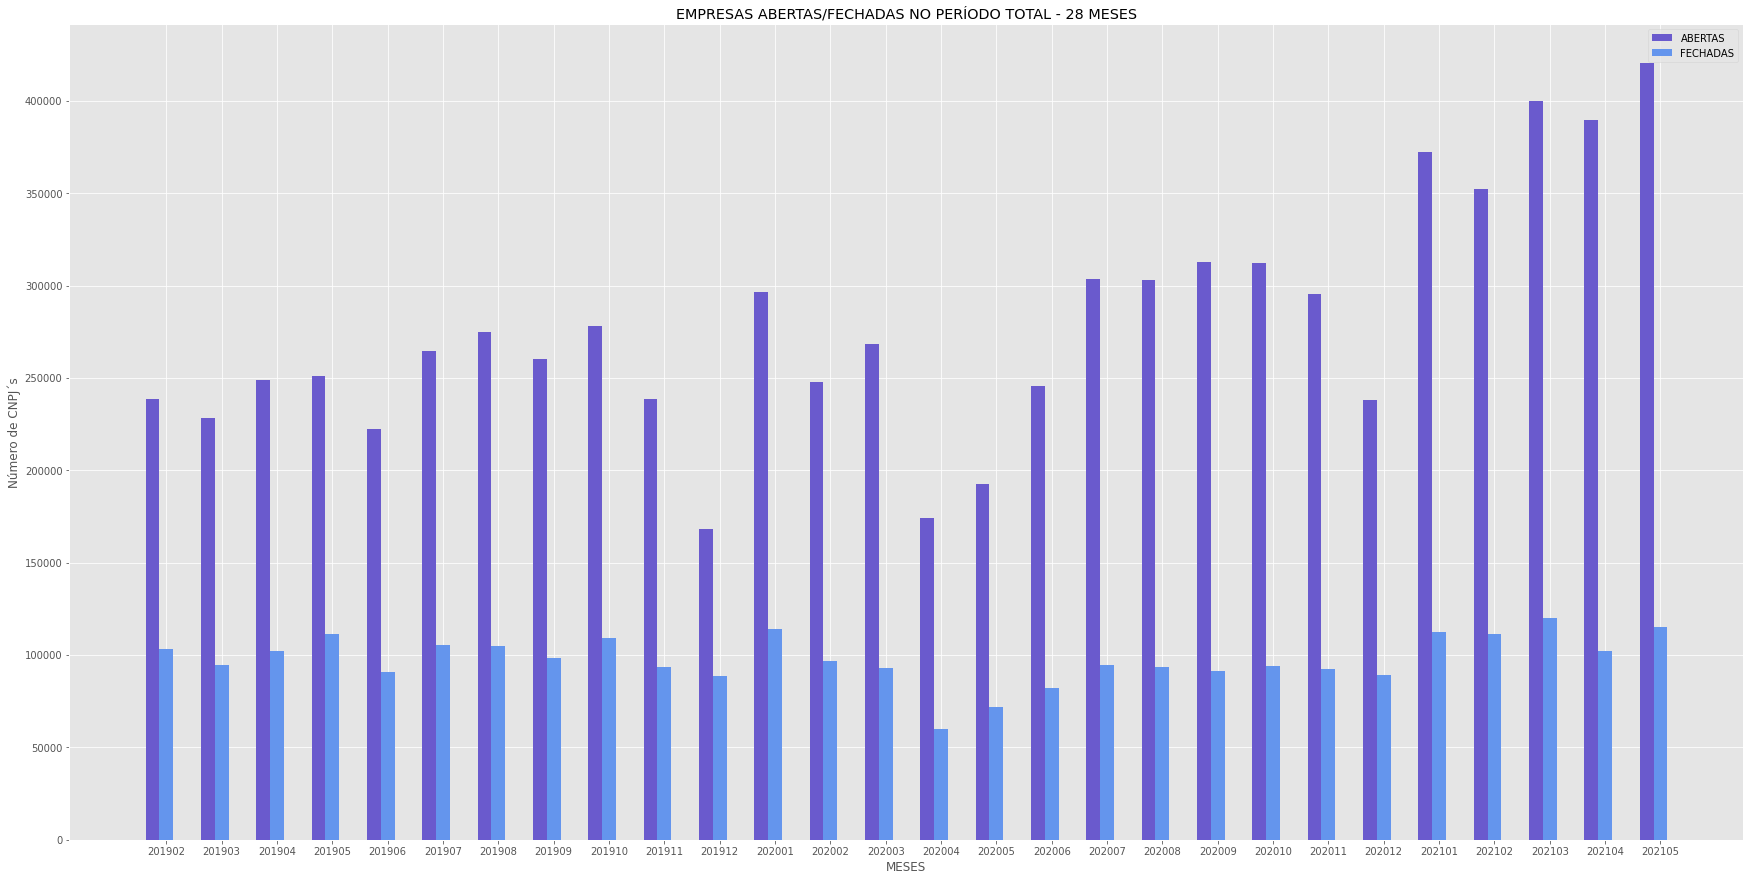

In [45]:
plt.figure(figsize=(30,15))
plt.bar(r1, cnpj_final_abertas_total_graf_data, color='#6A5ACD', width=barWidth, label='ABERTAS')
plt.bar(r2, cnpj_final_fechadas_total_graf_data, color='#6495ED', width=barWidth, label='FECHADAS')

plt.xlabel('MESES')
plt.xticks([r + barWidth for r in range(len(cnpj_final_abertas_total_graf_data))], cnpj_final_abertas_total_graf_data.index)
plt.ylabel('Número de CNPJ´s')
plt.title("EMPRESAS ABERTAS/FECHADAS NO PERÍODO TOTAL - 28 MESES")


plt.legend()
plt.show()

**ANÁLISE DA EMPRESAS QUE ABRIRAM E FECHARAM POR CNAE**

In [46]:
cnpj_final_abertas_total_graf_cnae = cnpj_final_abertas_total.groupby('cnae_secao_numero')['cnae_secao_numero'].count().sort_values(ascending=False)
cnpj_final_fechadas_total_graf_cnae = cnpj_final_fechadas_total.groupby('cnae_secao_numero')['cnae_secao_numero'].count().sort_values(ascending=False)

In [47]:
barWidth =  0.25
r1 = np.arange(len(cnpj_final_abertas_total_graf_cnae))
r2 = [x+barWidth for x in r1]

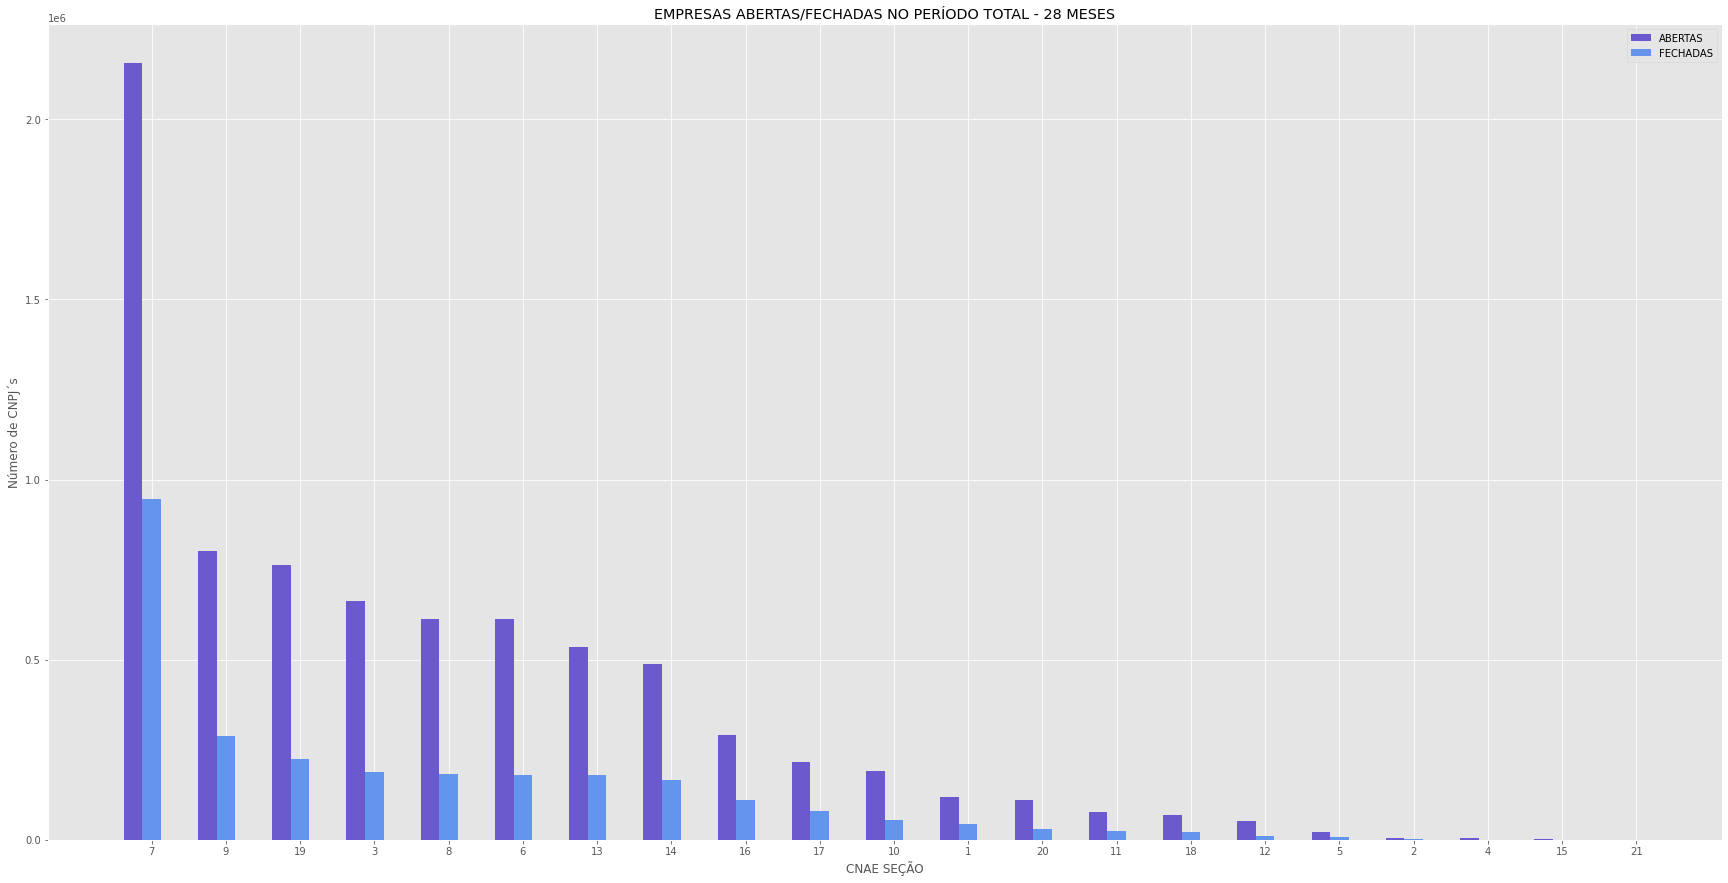

In [48]:
plt.figure(figsize=(30,15))
plt.bar(r1, cnpj_final_abertas_total_graf_cnae, color='#6A5ACD', width=barWidth, label='ABERTAS')
plt.bar(r2, cnpj_final_fechadas_total_graf_cnae, color='#6495ED', width=barWidth, label='FECHADAS')

plt.xlabel('CNAE SEÇÃO')
plt.xticks([r + barWidth for r in range(len(cnpj_final_abertas_total_graf_cnae))], cnpj_final_abertas_total_graf_cnae.index)
plt.ylabel('Número de CNPJ´s')
plt.title("EMPRESAS ABERTAS/FECHADAS NO PERÍODO TOTAL - 28 MESES")


plt.legend()
plt.show()